In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-v0_8-darkgrid')
import warnings
warnings.filterwarnings('ignore')

First i stated with importing the libraries that i will be using for this project. 

I will be using pandas to read the data and numpy to do some calculations. 

I will also be using matplotlib and seaborn to do some visualizations.


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
745,12,100,84,33,105,30.0,0.488,46,0
100,1,163,72,0,0,39.0,1.222,33,1
621,2,92,76,20,0,24.2,1.698,28,0
705,6,80,80,36,0,39.8,0.177,28,0
583,8,100,76,0,0,38.7,0.190,42,0


I started  by reading the data and getting a sample of the data to see what i am working with.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


I used the info() method to get a summary of the data and see if there are any missing values.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Then  i used the describe() method to get a summary of the numerical data.  

And as i was looking at the data i noticed that there are some values that are 0 and i don't know if these values are missing and the 0 was a placeholder or if they are actual values so i will be looking into that.  

### Can minimum value of below listed columns be zero (0)?
#### After doing some research I found that on these columns, a value of zero does not make sense and thus indicates missing value.

#### 1- BloodPressure
#### 2- SkinThickness
#### 3- BMI
### So I'm going to replace all those zeros with NAN
#### Note : a value of zero in the insulin & glocose is not normal but acceptable

In [6]:
cols = ['BloodPressure','SkinThickness','BMI']

df[cols] = df[cols].replace(0,np.NaN)

Here i replaced the values that were equal to 0 in these three columns and i set the NaN using the `np.nan` function.


## Splitting the data

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size= 0.2, random_state= 42)

Here i split the data into training and testing data using the `train_test_split` function from sklearn.        

## Cleaning train data

In [8]:
train.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                24
SkinThickness               176
Insulin                       0
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

The first thing i did was to check for missing values in the training data and i found that there are missing values in the `BloodPressure`, `BMI`and the `SkinThickness` columns.   

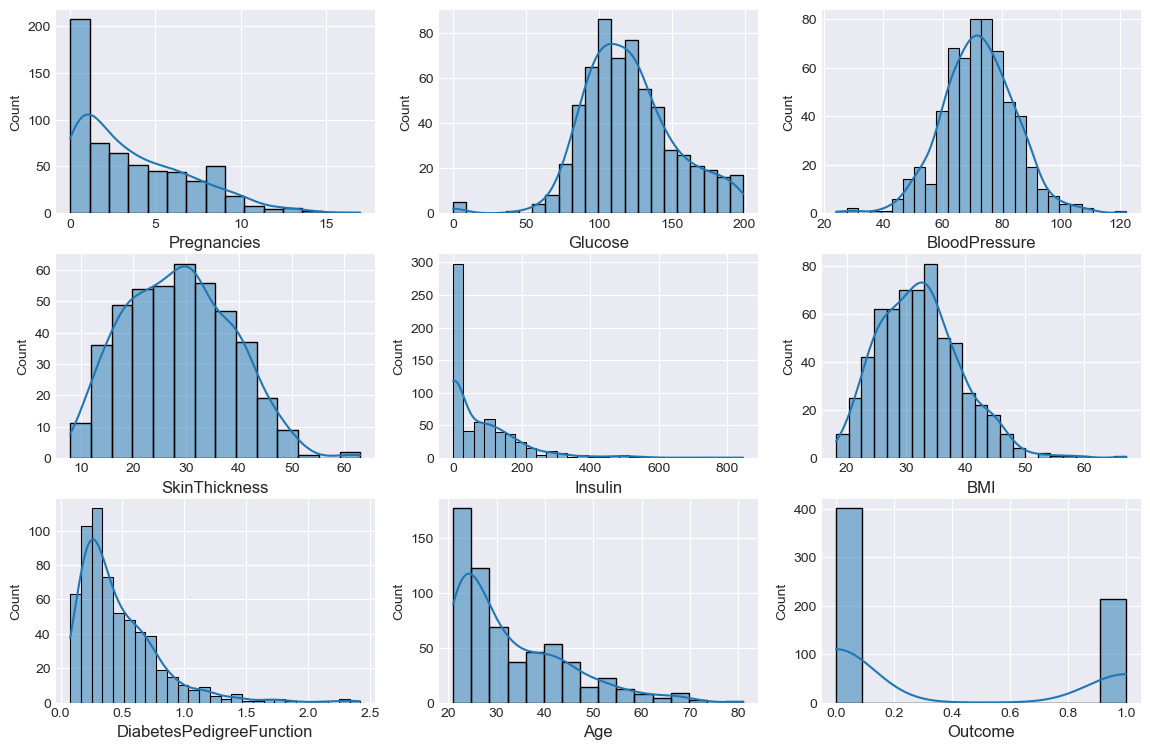

In [9]:
plt.figure(figsize = (14,9))
for i,col in enumerate(train):
    plt.subplot(3,3,i+1)
    sns.histplot(data = train, x=col, kde=True)
    plt.xlabel(col, fontsize = 12)
    plt.xticks(fontsize = 10)

Then i used the matplotlib library to visualize the data and see the distribution of the data and i found that the data is skewed so i will be using the `IterativeImputer` fill the missing values. 

I used the `IterativeImputer` function from sklearn to fill the missing values with the regression strategy. 


## Iterative_imputer 

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(estimator= RandomForestRegressor(n_estimators=100), max_iter=10,random_state=42)
imputed_train = imp.fit_transform(train)

I imported the `IterativeImputer` function from sklearn then i set the estimator to the `RandomForestRegressor` and i set the `max_iter` to 10 and i set the `random_state` to 42. 

Then i used the `fit_transform` method to fit the data and transform it. 

In [12]:
train = pd.DataFrame(imputed_train, columns = train.columns)

Then i replaced the values in the training data with the new values.    

In [13]:
train.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

And i checked for missing values again and i found that there are no missing values.

Looking back at the data there were some values that were apparently high and i don't know if they are outliers or not so i will be looking into that.

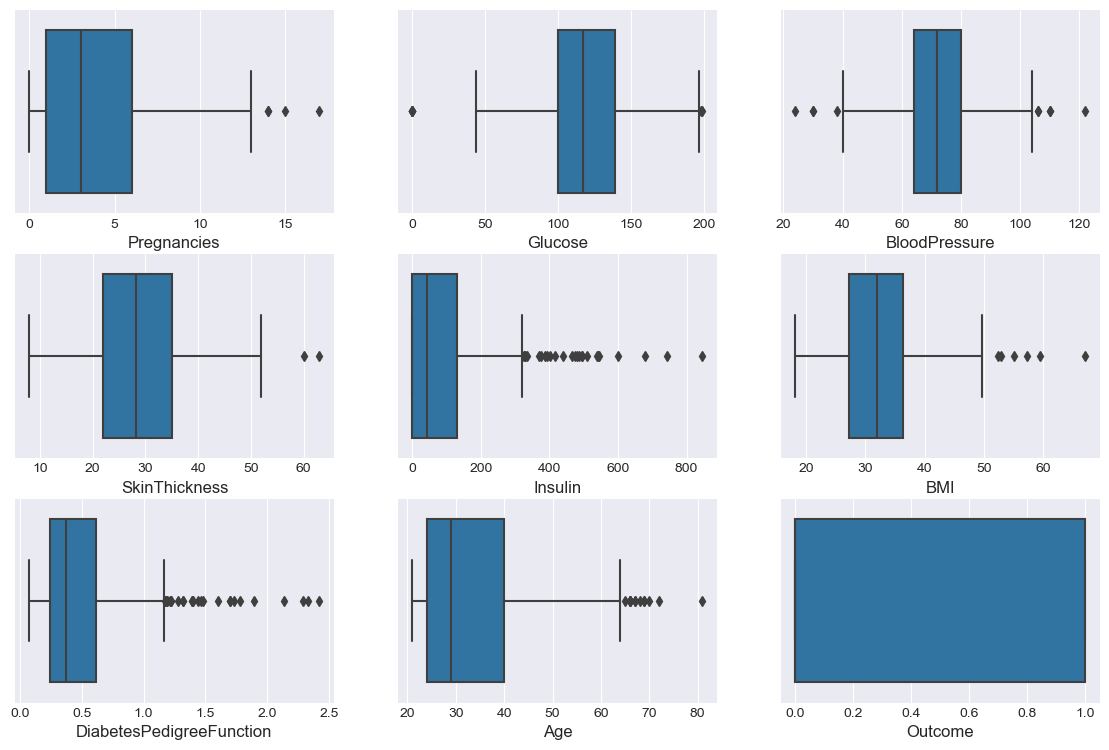

In [14]:
plt.figure(figsize=(14,9))
for i,col in enumerate(train):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = train,x=col)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=10)

As I anticipated, there are some outliers in the data. I will be using a function to remove the outliers.

In [15]:
def detect_outliers(df):
    outliers = []
    
    for col in df.columns:
        # Calculate quartiles and IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # Define the fences
        fence_low = q1 - (1.5 * iqr)
        fence_high = q3 + (1.5 * iqr)
        
        # Identify outliers
        outliers_mask_low = df[col] < fence_low
        outliers_mask_high = df[col] > fence_high
        num_outliers = outliers_mask_low.sum() + outliers_mask_high.sum()
        
        # Replace outliers with fence values
        df.loc[outliers_mask_low, col] = fence_low
        df.loc[outliers_mask_high, col] = fence_high
        
        # Add information to the outliers list
        outliers.append({'Feature': col, "Num of Outliers": num_outliers, "Handled?": True})
    
    # Convert the list of dictionaries to a DataFrame
    outliers_df = pd.DataFrame(outliers, columns=["Feature", "Num of Outliers", "Handled?"])
    
    return outliers_df

This function `detect_outliers` that i made will :
- Take a dataframe as an input
- iterate over the columns of the dataframe
- calculate the IQR for each column 
- calculate the upper and lower bounds for each column
- return a dictionary with the column name as a key and the number of outliers as a value
- handle the outliers by replacing them with the upper and lower bounds
- return a dataframe with the outliers

In [16]:
detect_outliers(train)

,Feature,Num of Outliers,Handled?
0,Pregnancies,4,True
1,Glucose,7,True
2,BloodPressure,9,True
3,SkinThickness,2,True
4,Insulin,26,True
5,BMI,6,True
6,DiabetesPedigreeFunction,26,True
7,Age,13,True
8,Outcome,0,True


And the `detect_outliers` function will remove the outliers from the data and return the number of outliers that were removed.

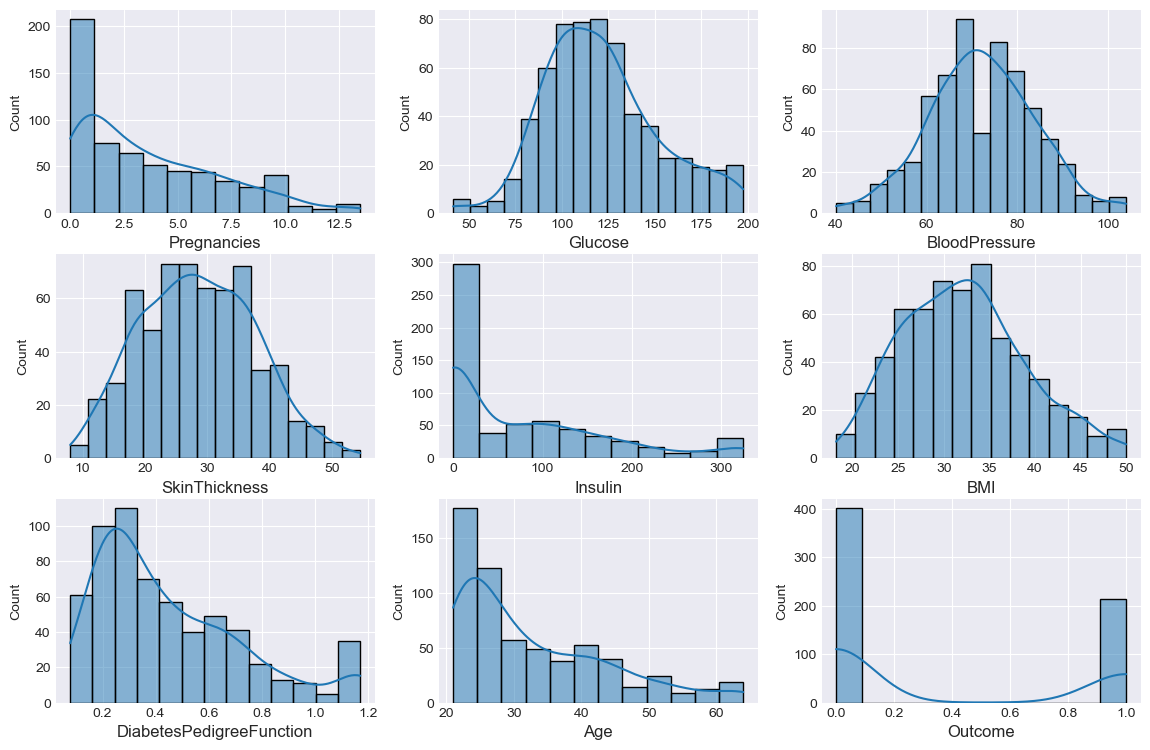

In [17]:
plt.figure(figsize = (14,9))
for i,col in enumerate(train):
    plt.subplot(3,3,i+1)
    sns.histplot(data = train, x=col, kde=True)
    plt.xlabel(col, fontsize = 12)
    plt.xticks(fontsize = 10)

Something doesn't seem right with the `Pregnancies` column so i will be looking into that.

In [18]:
train['Pregnancies'].value_counts()

Pregnancies
1.0     116
0.0      91
2.0      75
3.0      64
4.0      52
5.0      45
6.0      44
7.0      35
8.0      28
9.0      22
10.0     19
11.0      8
13.0      6
12.0      5
13.5      4
Name: count, dtype: int64

It seems that the outliers in the pregnancies were set to 13.5 so i will set them back to 13 because 13.5 is not possible

In [19]:
train.loc[train['Pregnancies'] > 13, 'Pregnancies'] = 13

In [20]:
train['Pregnancies'].value_counts()

Pregnancies
1.0     116
0.0      91
2.0      75
3.0      64
4.0      52
5.0      45
6.0      44
7.0      35
8.0      28
9.0      22
10.0     19
13.0     10
11.0      8
12.0      5
Name: count, dtype: int64

Everything seems to be in order now so i will be moving on to the next step.

## Cleaning test data

I'll repeat what i did with the train data but the imputations will be from the train data to prevent data lekage.

In [21]:
test.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               11
SkinThickness               51
Insulin                      0
BMI                          4
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

### Iterative_imputer

In [22]:
imputed_test = imp.transform(test)
test = pd.DataFrame(imputed_test, columns = test.columns)

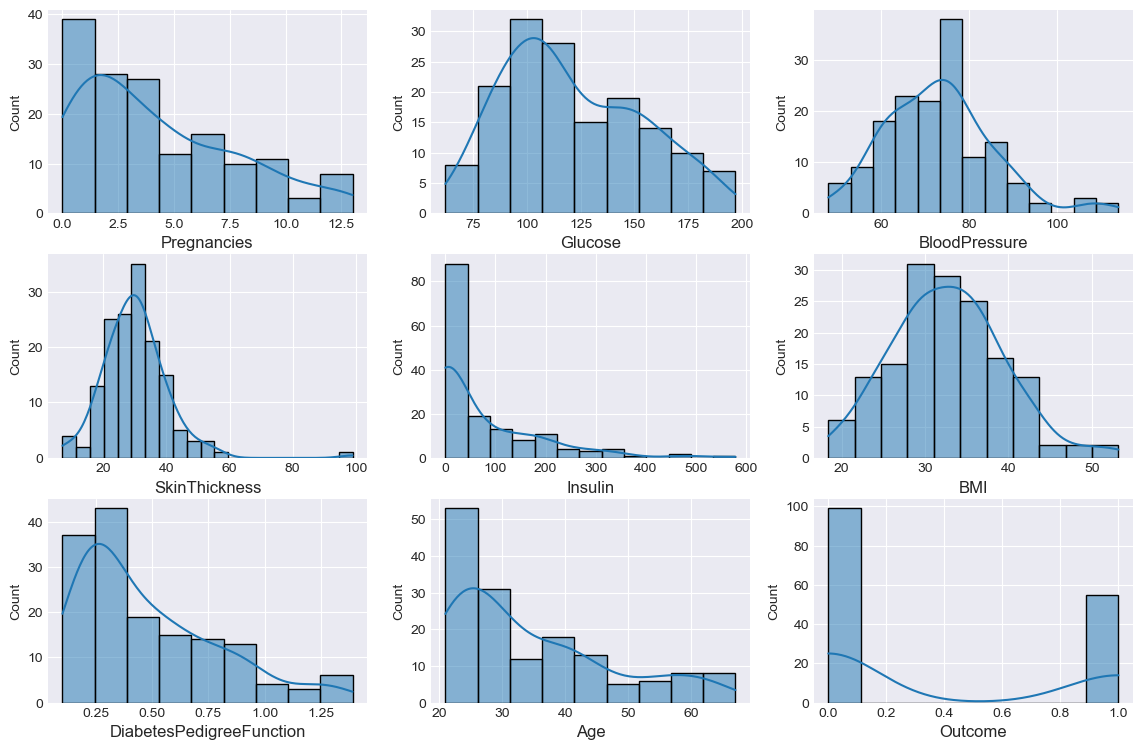

In [23]:
plt.figure(figsize = (14,9))
for i,col in enumerate(test):
    plt.subplot(3,3,i+1)
    sns.histplot(data = test, x=col, kde=True)
    plt.xlabel(col, fontsize = 12)
    plt.xticks(fontsize = 10)

In [24]:
detect_outliers(test)

,Feature,Num of Outliers,Handled?
0,Pregnancies,0,True
1,Glucose,0,True
2,BloodPressure,5,True
3,SkinThickness,4,True
4,Insulin,8,True
5,BMI,3,True
6,DiabetesPedigreeFunction,2,True
7,Age,0,True
8,Outcome,0,True


## EDA

In this step 'Exploratory Data Analysis' i will be looking at the data and trying to find some insights.

<Axes: >

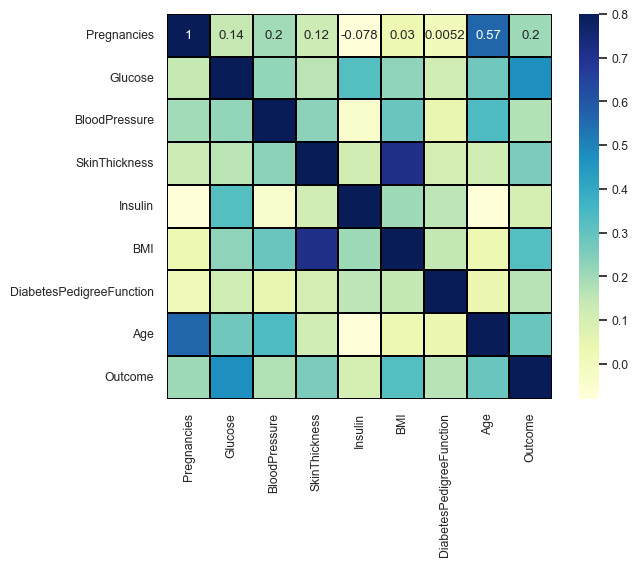

In [25]:
sns.set(font_scale=0.8)
plt.figure(figsize=(7, 5))
sns.heatmap(train.corr(),vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")

The only feature that shows somewhat correlation with the target column is the glocuse level

<Axes: xlabel='Outcome', ylabel='count'>

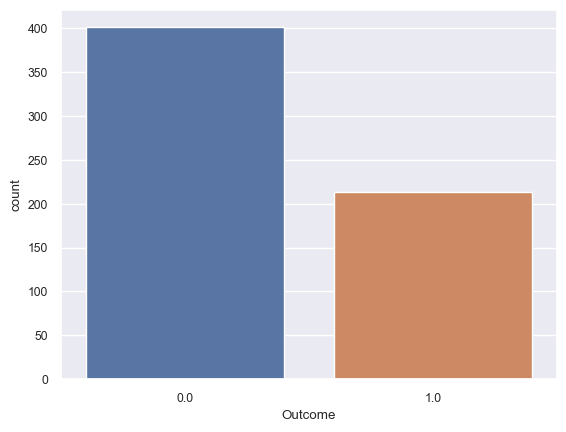

In [26]:
sns.countplot(x = 'Outcome', data = train)

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually, The number of non-diabetics is almost twice the number of diabetic patients

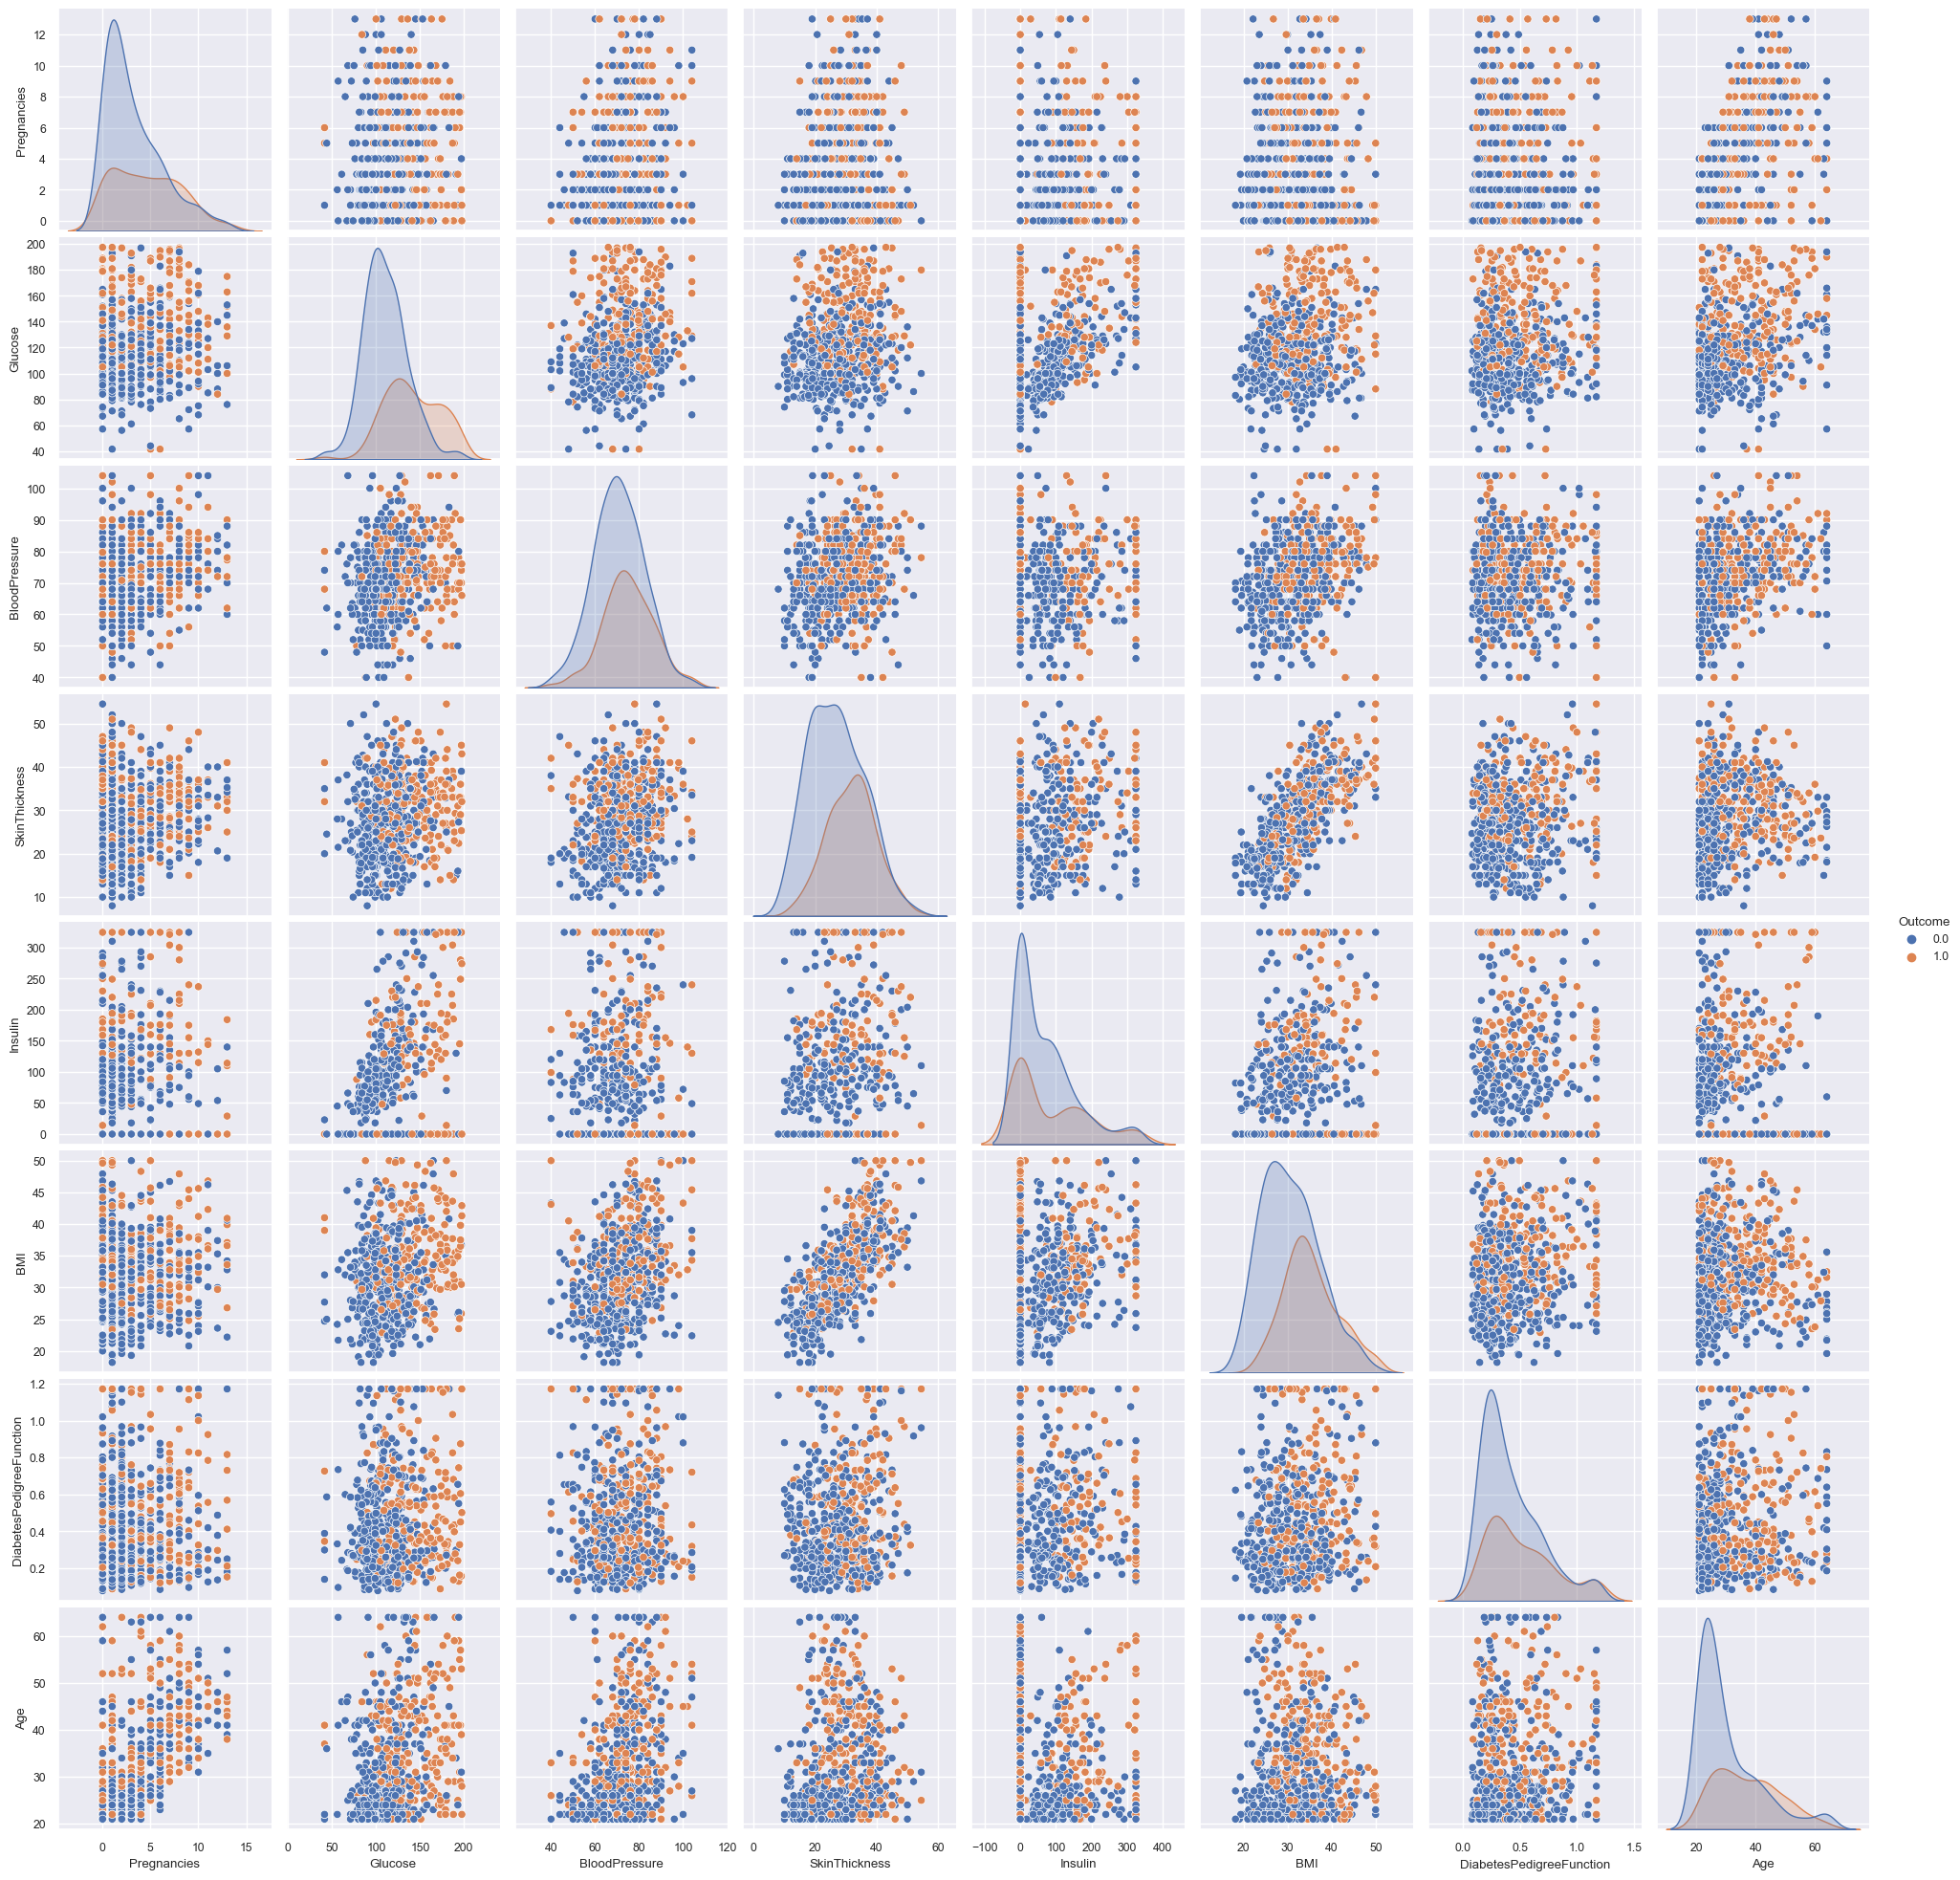

In [27]:
sns.pairplot(data = train ,hue='Outcome')

### Slicing the labels

Here i sliced the labels from the training data to use them in the model.

In [28]:
x_train = train.drop('Outcome', axis = 1)
y_train = train['Outcome']
x_test = test.drop('Outcome', axis = 1)
y_test = test['Outcome']

### Scaling the data

Here i will be scaling the data using the `StandardScaler` function from sklearn.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

## Modeling

In this step i will be trying different models and see which one performs the best.

### Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

#### Logistic regression Accuracy

In [31]:
from sklearn.metrics import accuracy_score
y_pred_l = log_reg.predict(x_test)
logistic_acc = accuracy_score(y_test, y_pred_l)
print(f'Logistic regression accuracy = {logistic_acc:.4f}')

Logistic regression accuracy = 0.7597


### Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200, max_depth = 3 ,random_state = 42)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

#### Random Forest Accuracy

In [33]:
y_pred_r = RFC.predict(x_test)
rfc_acc = accuracy_score(y_test, y_pred_r)
print(f'Random forests classifier accuracy = {rfc_acc:.4f}')

Random forests classifier accuracy = 0.7792


### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 111)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=111)

#### KNN Accuracy

In [35]:
y_pred_k = KNN.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred_k) 
print(f'KNN classifier accuracy = {knn_acc:.4f}')

KNN classifier accuracy = 0.7857


### XGB

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 25, max_depth = 2)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### XGB Accuracy

In [37]:
y_pred_x = xgb.predict(x_test)
xgb_acc = accuracy_score(y_test, y_pred_x)
print(f'XGB classifier accuracy = {xgb_acc:.4f}')

XGB classifier accuracy = 0.7662


### SVM

In [38]:
from sklearn.svm import SVC
svm = SVC(kernel= 'linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

#### SVM Accuracy

In [39]:
y_pred_s = svm.predict(x_test)
svc_acc = accuracy_score(y_test, y_pred_s)
print(f'SVM classifier accuracy = {svc_acc:.4f}')

SVM classifier accuracy = 0.7792


The models :
- Logistic regression
- Random Forest 
- KNN
- XGB
- SVM   
performed almost the same so i will be ensembling them to see if i can get a better result. 

### Ensambling the five models

In [40]:
final_prediction = []
for i in range(len(y_test)):
    if ((y_pred_k[i] + y_pred_r[i] + y_pred_x[i] + y_pred_l[i] + y_pred_s[i]) / 5) > 0.5 :
        final_prediction.append(1)
    else :
        final_prediction.append(0)

[Text(0, 0.5, 'Non Diabeties'), Text(0, 1.5, 'Diabeties')]

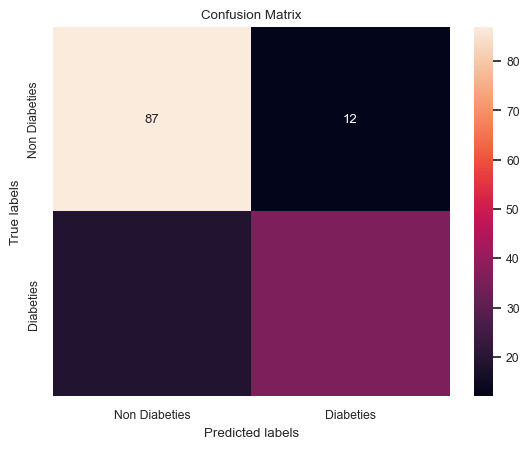

In [41]:
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_test,final_prediction)

ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non Diabeties', 'Diabeties']) 
ax.yaxis.set_ticklabels(['Non Diabeties', 'Diabeties'])

#### Ensambeld Accuracy

In [42]:
ensambled_acc = accuracy_score(y_test,final_prediction)
print(f'Ensambeld Accuracy = {ensambled_acc:.4f}')

Ensambeld Accuracy = 0.7987


And the ensambled model performed better than the other models.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_prediction))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85        99
         1.0       0.75      0.65      0.70        55

    accuracy                           0.80       154
   macro avg       0.79      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



As shown in the `classification_report` :
- The precision is 0.82 on the Non-diabetic class and 0.75 on the Diabetic class.
- The recall is 0.88 on the Non-diabetic class and 0.65 on the Diabetic class.
- The f1-score is 0.85 on the Non-diabetic class and 0.70 on the Diabetic class.    
- The accuracy is 0.80